NAME:AREEBA FAROOQ
REG NO:200901058
ML PROJECT


                PROJECT TITLE: Breast Cancer Diagnosis using ML


In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Loading dataset
df = pd.read_csv("cancer.csv")

In [71]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0                5               1                1              1   
1                5               4                4              5   
2                3               1                1              1   
3                6               8                8              1   
4                4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chrom  norm_nucleoli  mitoses  \
0                       2           1            3              1        1   
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   classes  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:
# Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
                 id  clump_thickness  unif_cell_size  unif_cell_shape  \
count  6.990000e+02       699.000000      699.000000       699.000000   
mean   1.071704e+06         4.417740        3.134478         3.207439   
std    6.170957e+05         2.815741        3.051459         2.971913   
min    6.163400e+04         1.000000        1.000000         1.000000   
25%    8.706885e+05         2.000000        1.000000         1.000000   
50%    1.171710e+06         4.000000        1.000000         1.000000   
75%    1.238298e+06         6.000000        5.000000         5.000000   
max    1.345435e+07        10.000000       10.000000        10.000000   

       marg_adhesion  single_epith_cell_size  bland_chrom  norm_nucleoli  \
count     699.000000              699.000000   699.000000     699.000000   
mean        2.806867                3.216023     3.437768       2.866953   
std         2.855379                2.214300     2.438364       3.053634   
min 

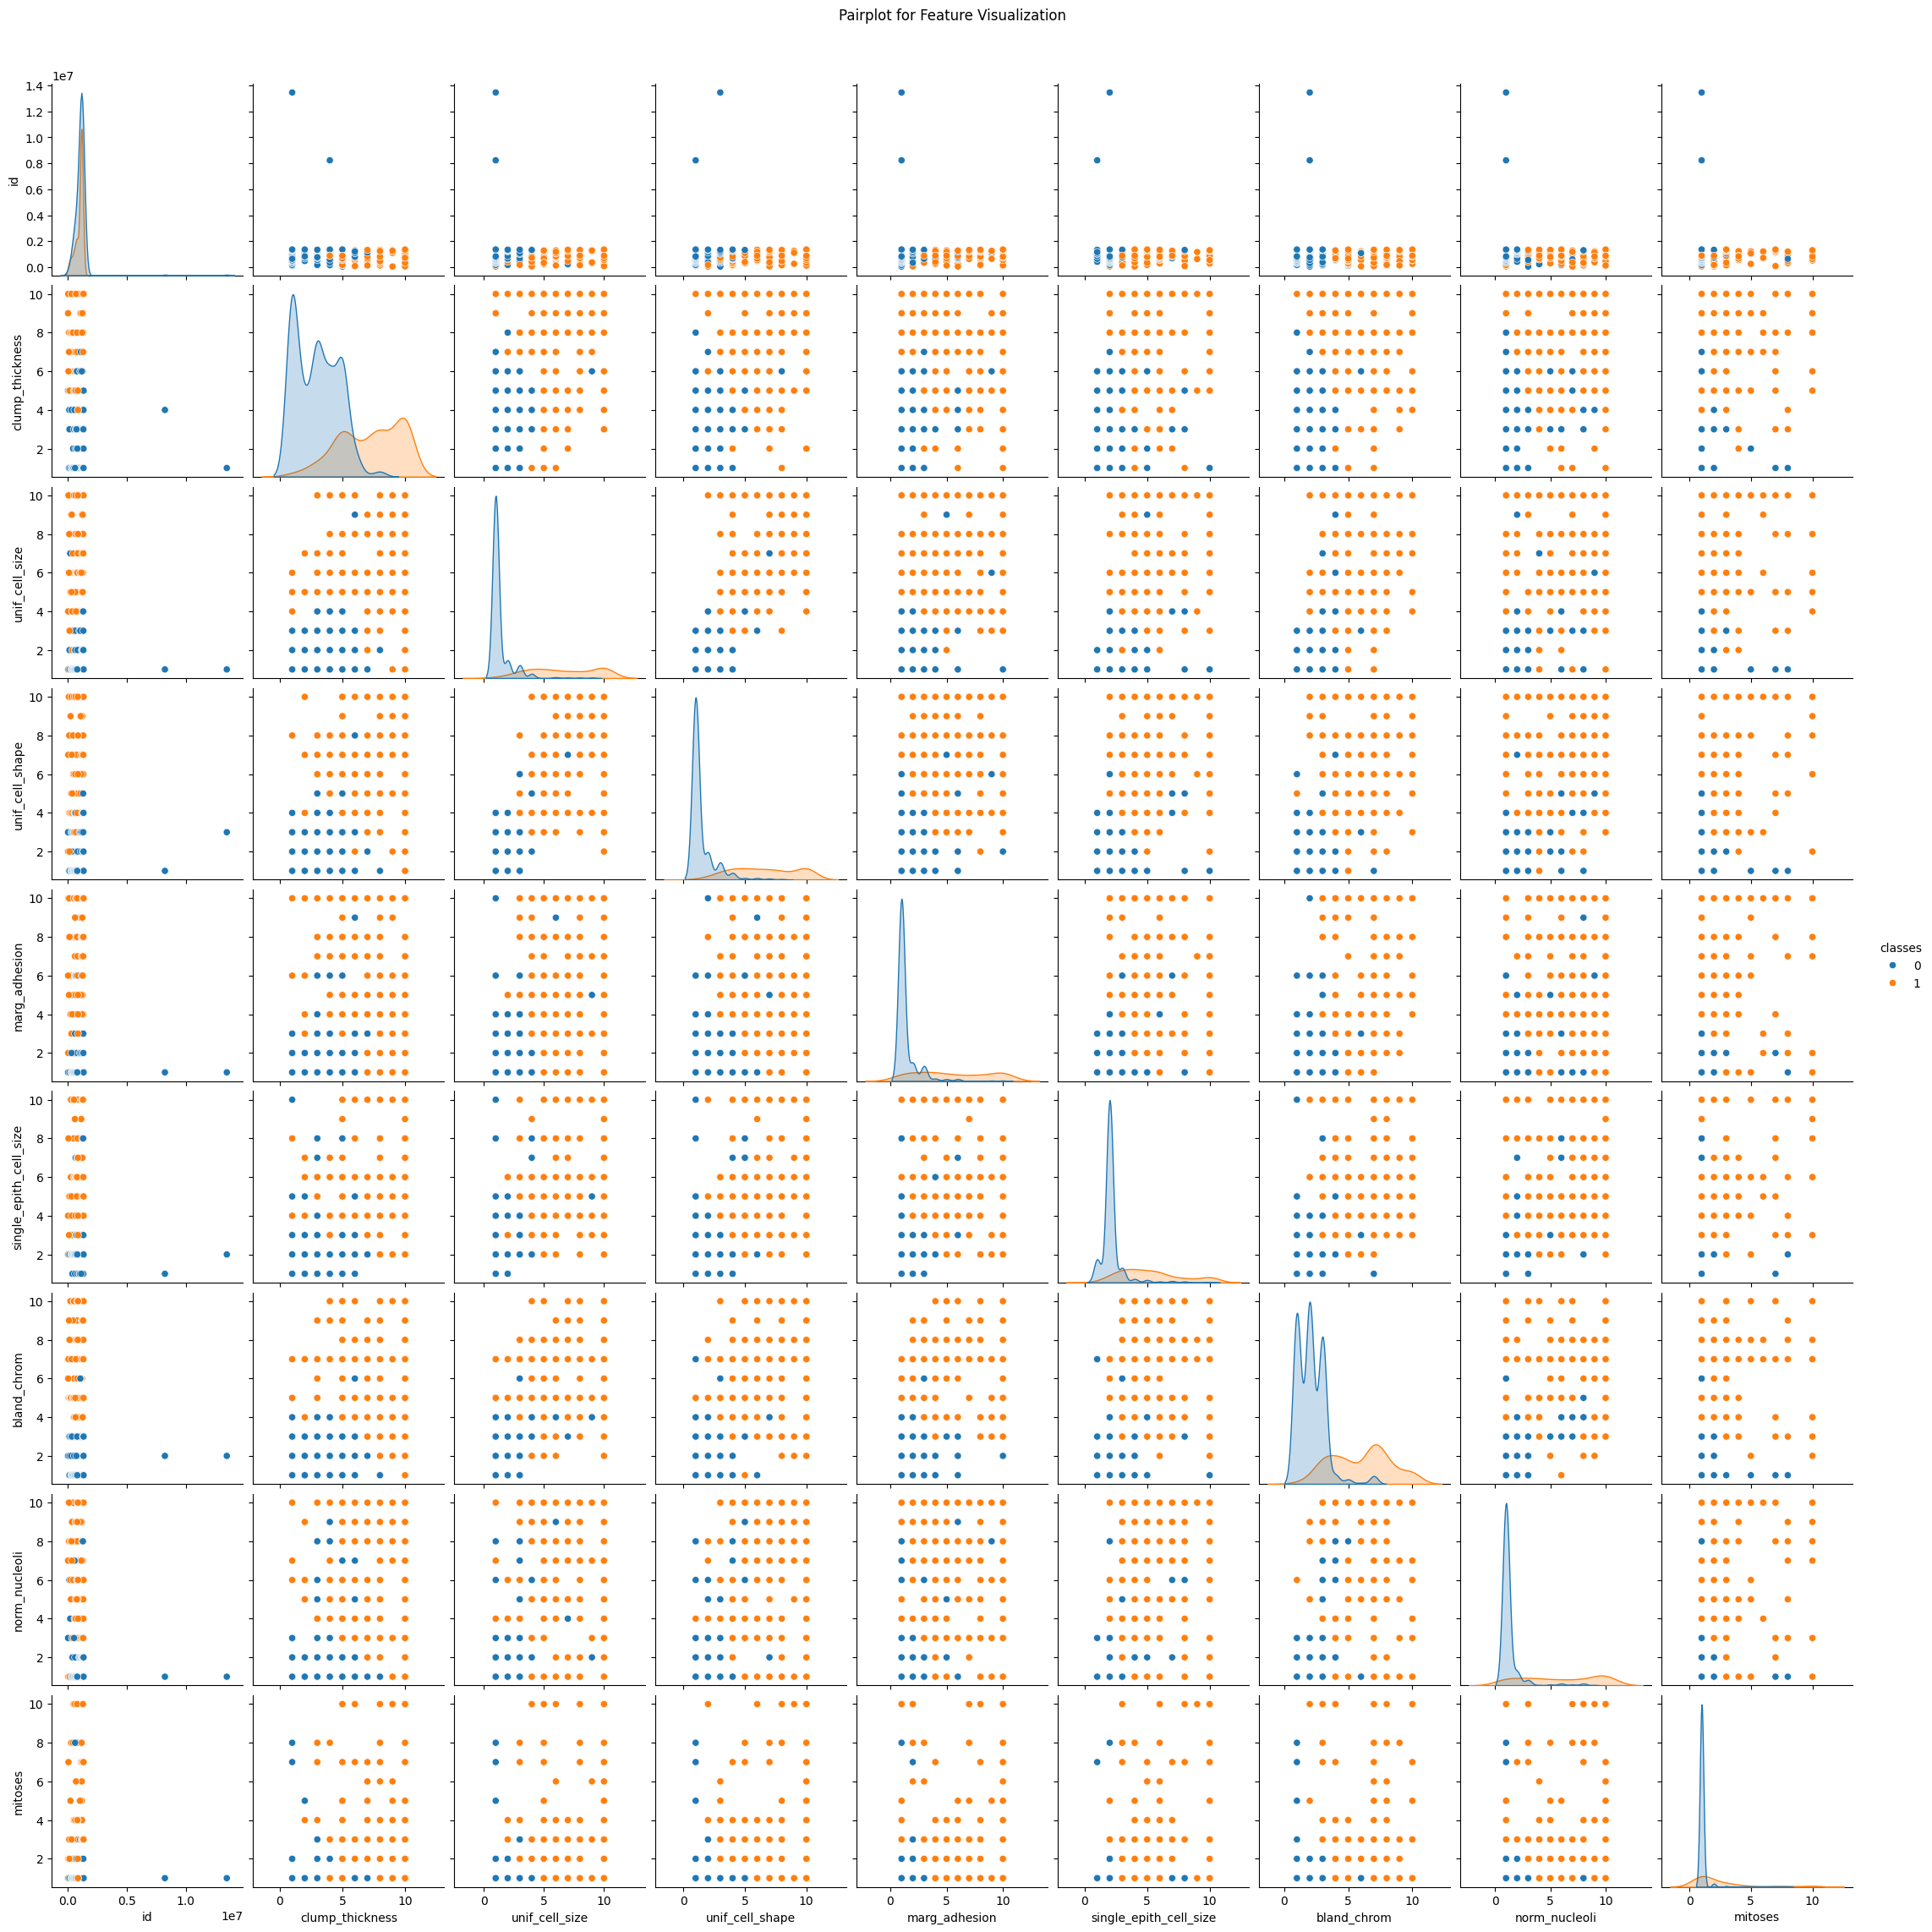

In [7]:

# Pairplot for feature visualization
sns.pairplot(df, hue='classes')
plt.suptitle("Pairplot for Feature Visualization", y=1.02)
plt.show()


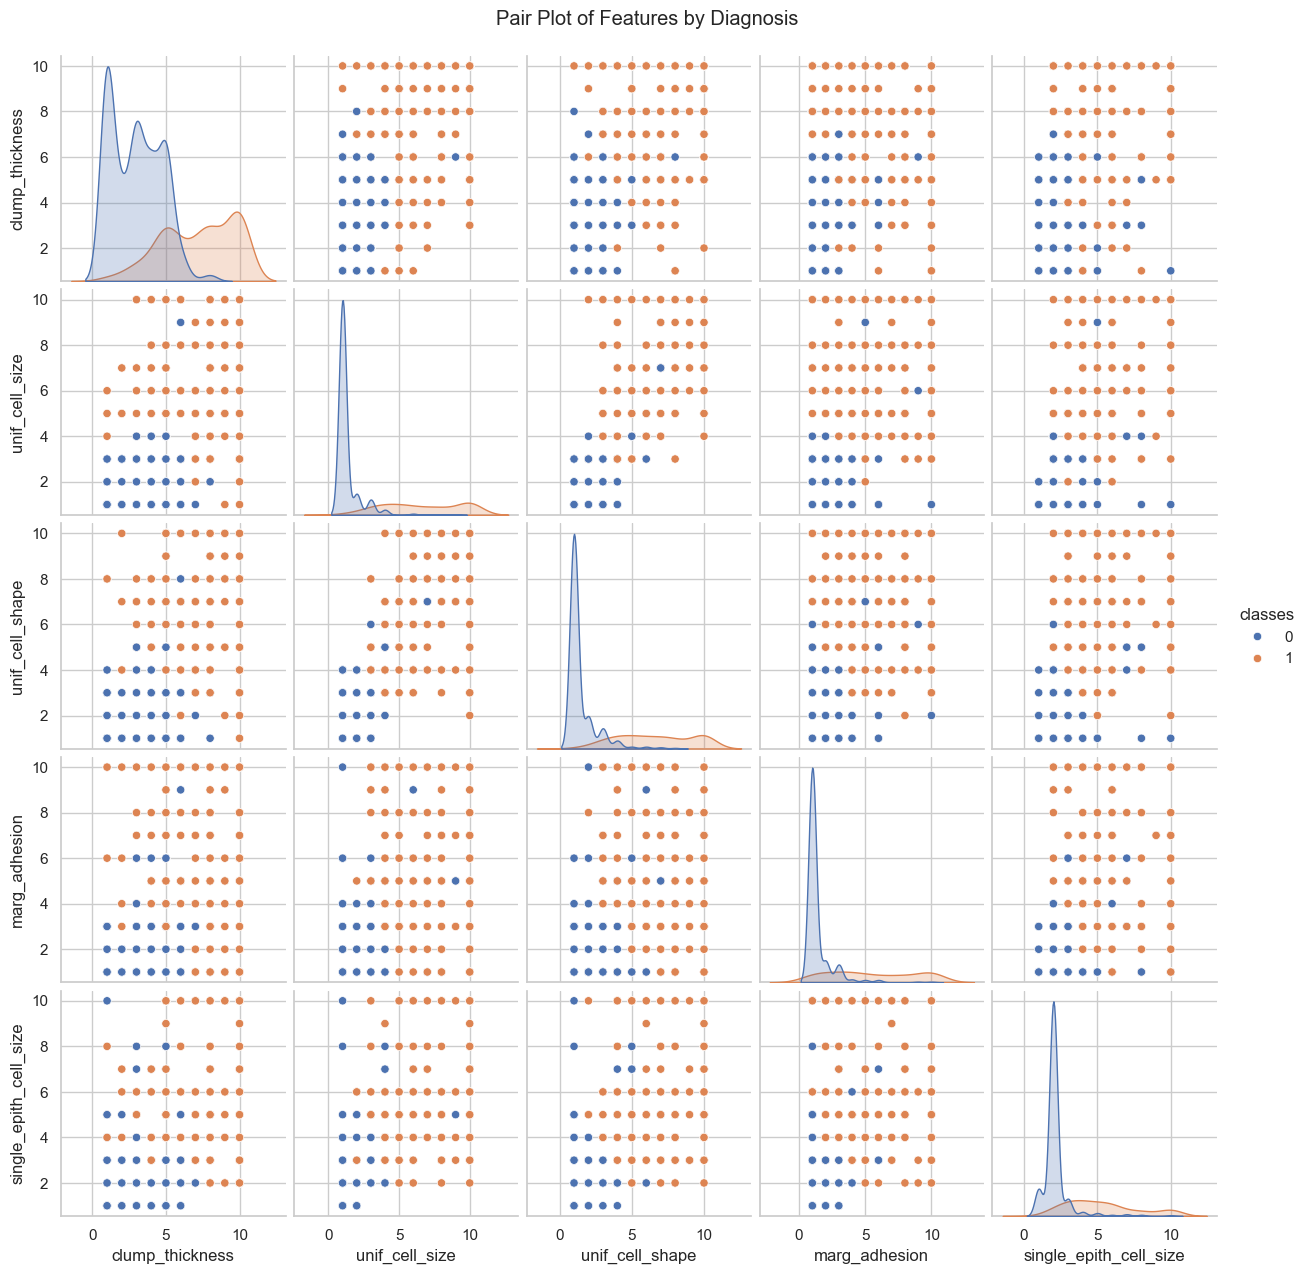

In [52]:
# Pair Plot wrt diagnosis
sns.pairplot(df, hue='classes', vars=['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size'])
plt.suptitle('Pair Plot of Features by Diagnosis', y=1.02)
plt.show()


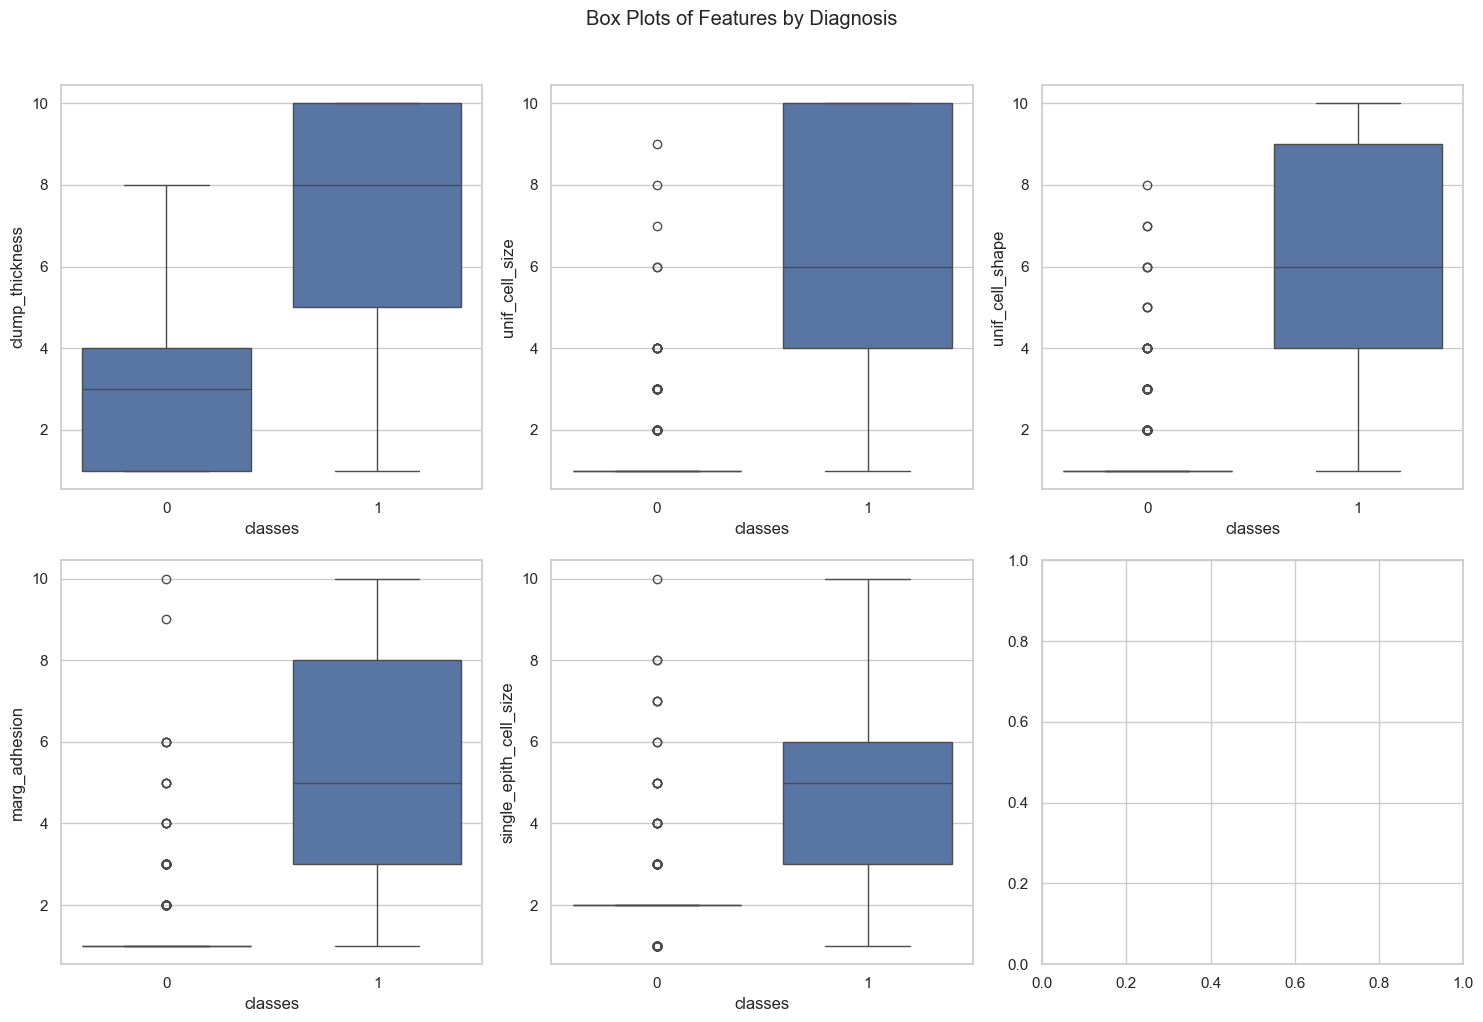

In [53]:
# Box Plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size']):
    sns.boxplot(x='classes', y=column, data=df, ax=axes[i//3, i%3])

fig.suptitle('Box Plots of Features by Diagnosis', y=1.02)
plt.tight_layout()
plt.show()

Handling missing values

In [9]:
df.replace('?', np.nan, inplace=True)
df.drop(columns=['id'], inplace=True)

In [10]:
# Convert 'bare_nuclei' to numeric (after handling missing values)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

In [11]:
# Display information about missing values
print("\nInformation about missing values:")
print(df.isnull().sum())


Information about missing values:
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
classes                    0
dtype: int64


In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

Feature Engineering

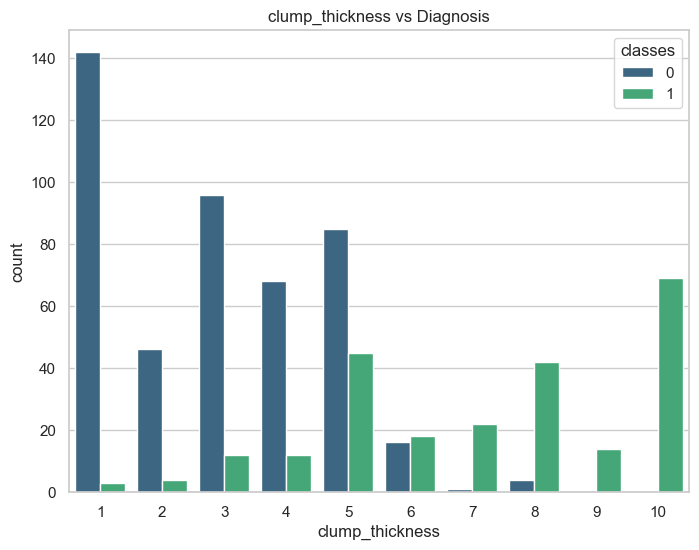

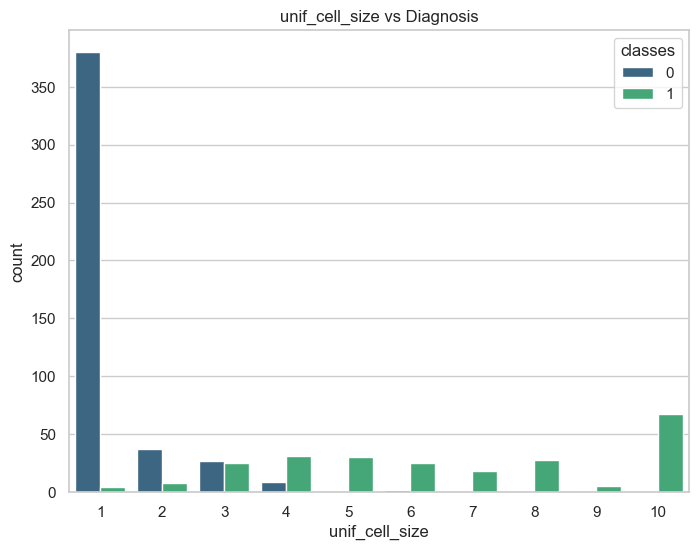

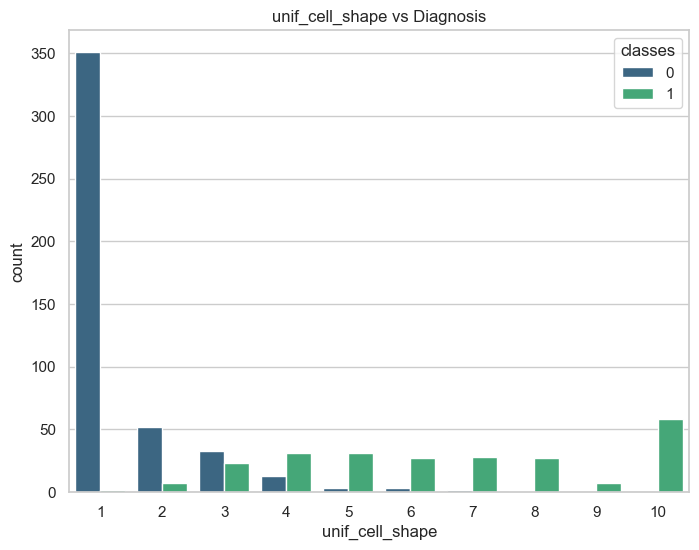

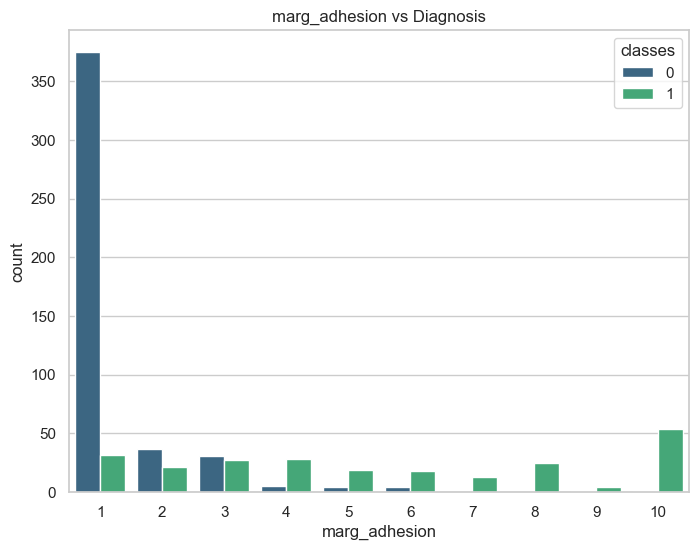

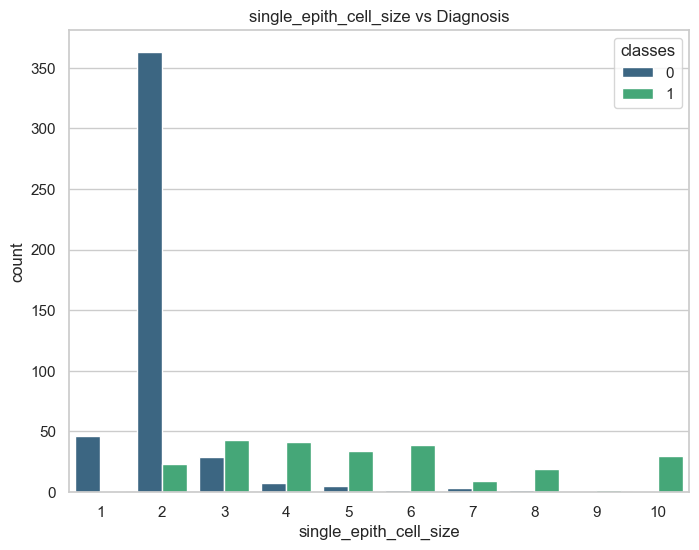

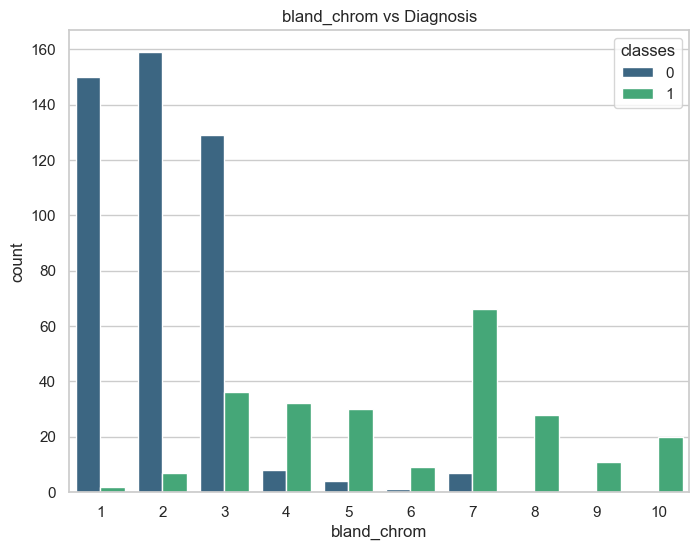

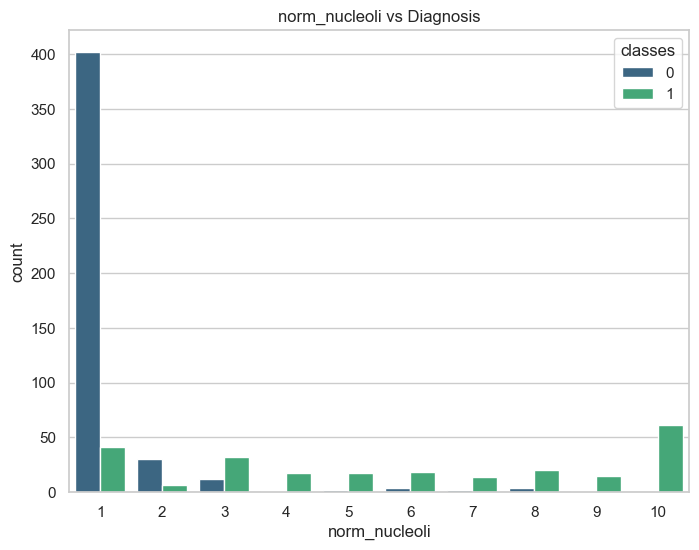

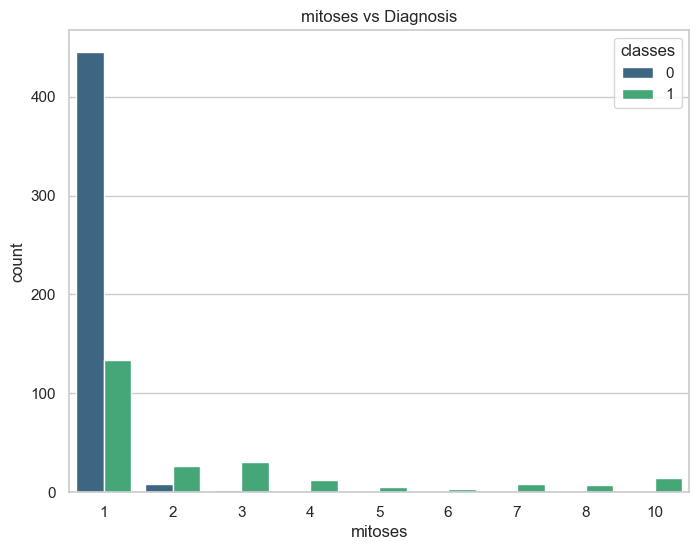

In [62]:
# Plotting bar plots for categorical features
categorical_features = ['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bland_chrom', 'norm_nucleoli', 'mitoses']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='classes', data=df, palette='viridis')
    plt.title(f'{feature} vs Diagnosis')
    plt.show()


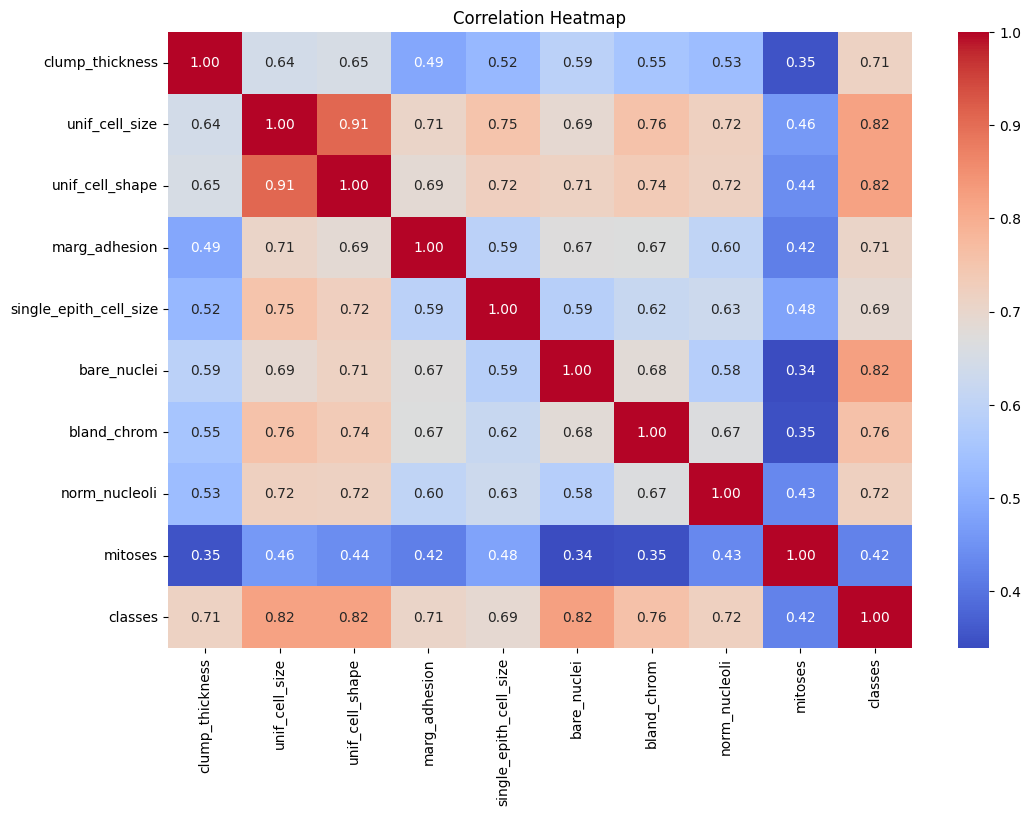

In [13]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

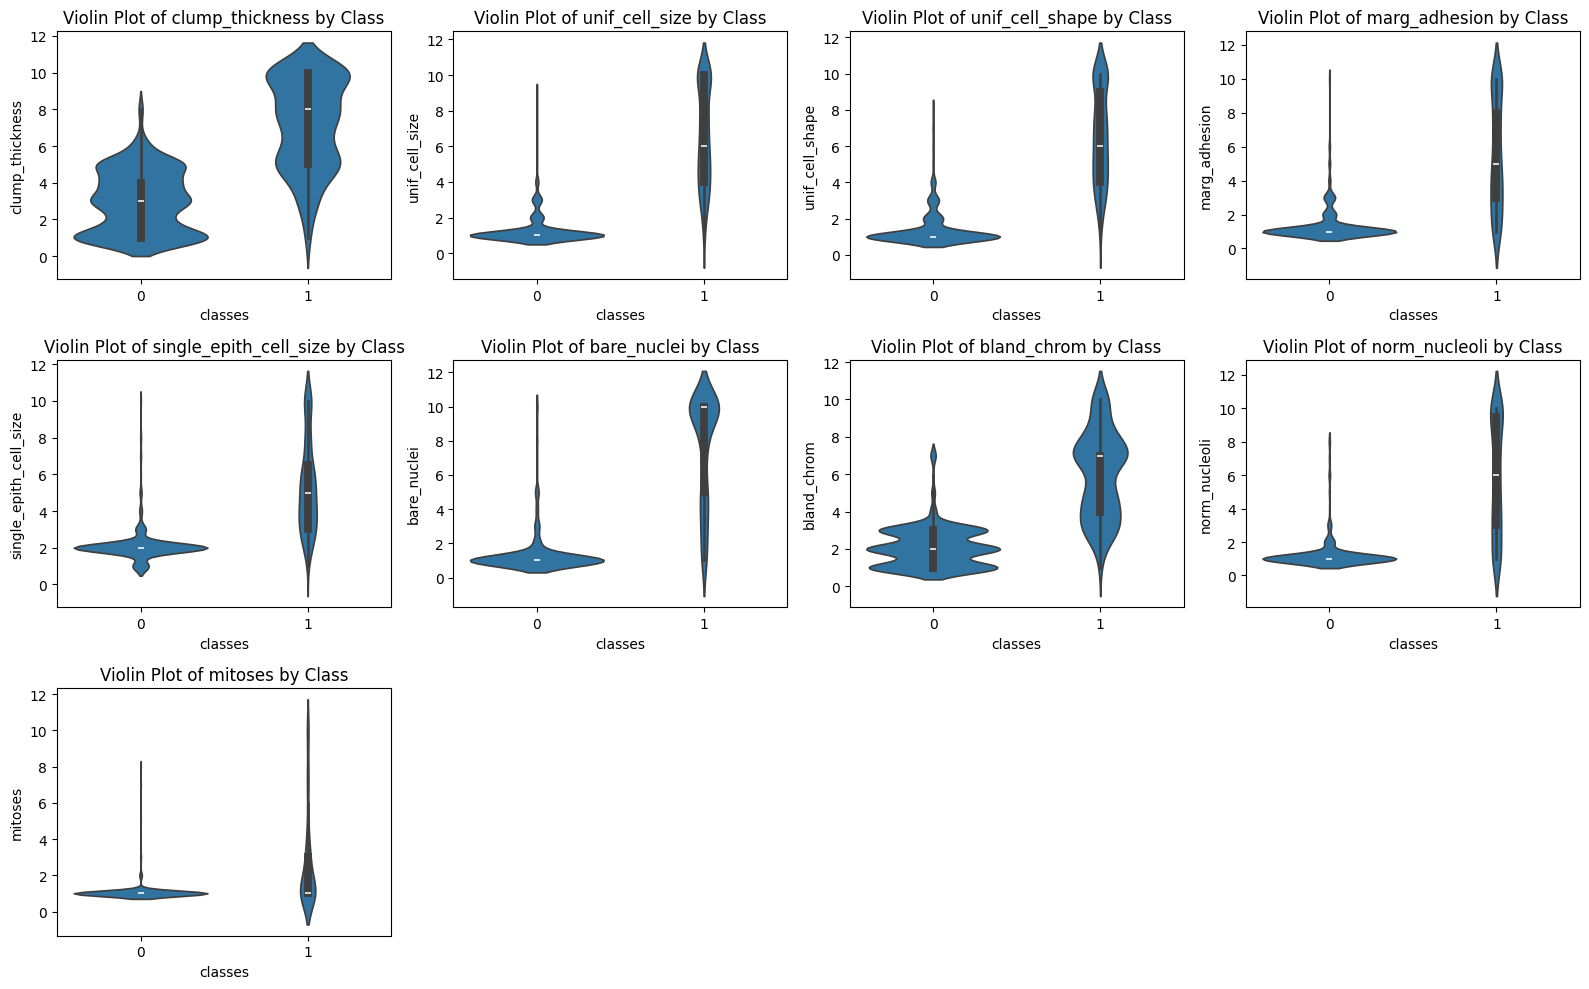

In [16]:
# Violin plot for each feature by class
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.violinplot(x='classes', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Class')
plt.tight_layout()
plt.show()

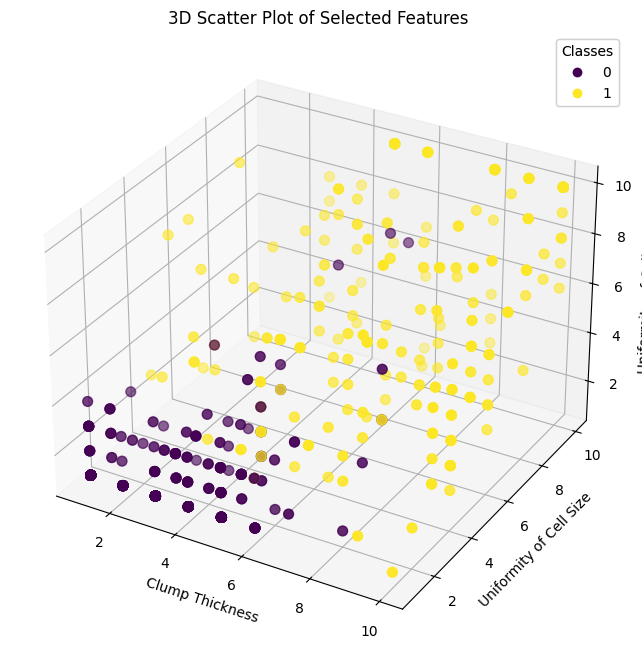

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting a subset of features
selected_features = ['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'classes']
subset_df = df[selected_features].copy()  

# Convert 'classes' to a categorical variable
subset_df.loc[:, 'classes'] = subset_df['classes'].astype('category')

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(subset_df['clump_thickness'], subset_df['unif_cell_size'], subset_df['unif_cell_shape'],
                     c=subset_df['classes'].cat.codes, cmap='viridis', s=50)

ax.set_xlabel('Clump Thickness')
ax.set_ylabel('Uniformity of Cell Size')
ax.set_zlabel('Uniformity of Cell Shape')

legend1 = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend1)

plt.title('3D Scatter Plot of Selected Features')
plt.show()


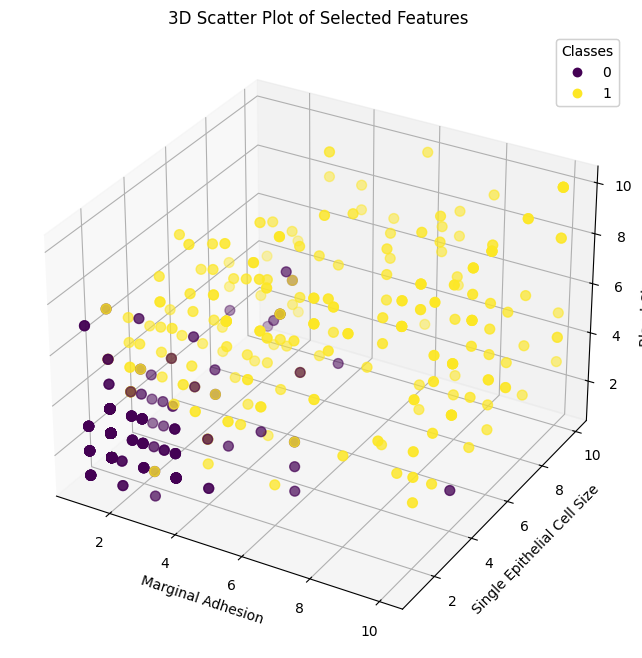

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting a different subset of features
selected_features = ['marg_adhesion', 'single_epith_cell_size', 'bland_chrom', 'classes']
subset_df = df[selected_features].copy()  

# Converting 'classes' to a categorical variable
subset_df.loc[:, 'classes'] = subset_df['classes'].astype('category')

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(subset_df['marg_adhesion'], subset_df['single_epith_cell_size'], subset_df['bland_chrom'],
                     c=subset_df['classes'].cat.codes, cmap='viridis', s=50)

ax.set_xlabel('Marginal Adhesion')
ax.set_ylabel('Single Epithelial Cell Size')
ax.set_zlabel('Bland Chromatin')

legend1 = ax.legend(*scatter.legend_elements(), title='Classes')
ax.add_artist(legend1)

plt.title('3D Scatter Plot of Selected Features')
plt.show()


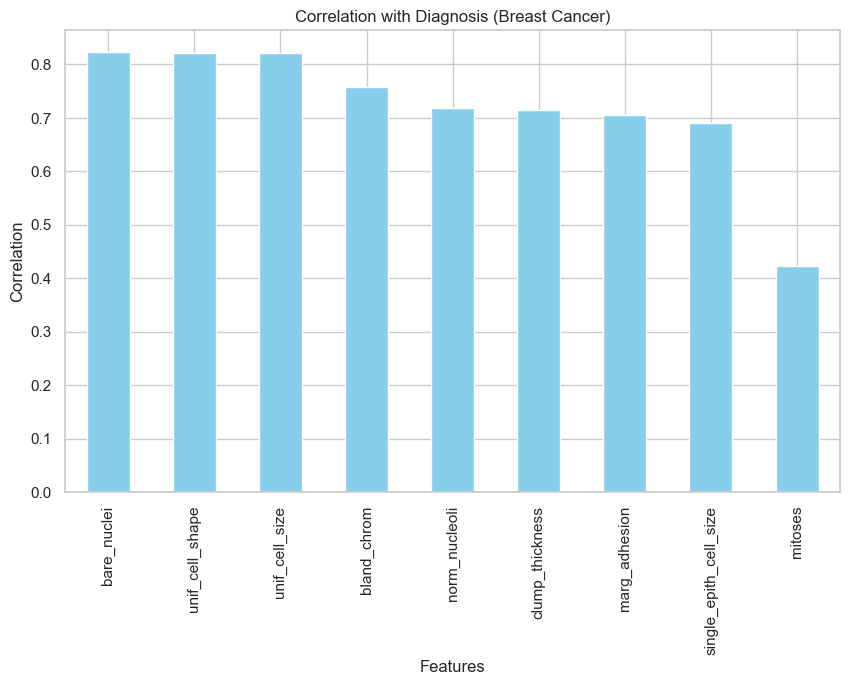

In [50]:
# Correlation with the target variable
target_correlation = correlation_matrix['classes'].sort_values(ascending=False)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
target_correlation.drop('classes').plot(kind='bar', color='skyblue')
plt.title("Correlation with Diagnosis (Breast Cancer)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

Training and Testing 

In [21]:
# Separate features (X) and target variable (y)
X = df.drop(['classes'], axis=1)
y = df['classes']

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.decomposition import PCA

# Applying  PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_


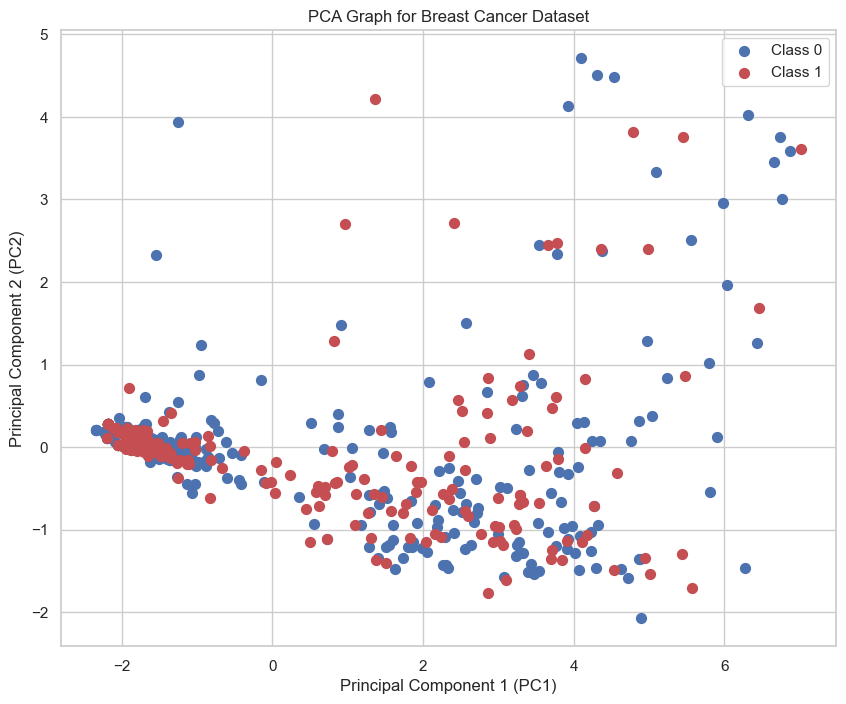

In [41]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating  DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plotting the PCA graph
plt.figure(figsize=(10, 8))
targets = [0, 1]  
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'],
                df_pca.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)

plt.title('PCA Graph for Breast Cancer Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(['Class 0', 'Class 1'])
plt.grid(True)
plt.show()


Confusion Matrix (KNN, k=1):
[[77  2]
 [ 9 49]]
Accuracy score of train KNN (k=1): 100.0
Accuracy score of test KNN (k=1): 91.97080291970804
Confusion Matrix (KNN, k=2):
[[77  2]
 [15 43]]
Accuracy score of train KNN (k=2): 96.52014652014653
Accuracy score of test KNN (k=2): 87.59124087591242
Confusion Matrix (KNN, k=3):
[[77  2]
 [ 6 52]]
Accuracy score of train KNN (k=3): 97.06959706959707
Accuracy score of test KNN (k=3): 94.16058394160584
Confusion Matrix (KNN, k=4):
[[77  2]
 [ 8 50]]
Accuracy score of train KNN (k=4): 96.7032967032967
Accuracy score of test KNN (k=4): 92.7007299270073
Confusion Matrix (KNN, k=5):
[[77  2]
 [ 6 52]]
Accuracy score of train KNN (k=5): 97.43589743589743
Accuracy score of test KNN (k=5): 94.16058394160584
Confusion Matrix (KNN, k=6):
[[77  2]
 [ 8 50]]
Accuracy score of train KNN (k=6): 97.25274725274726
Accuracy score of test KNN (k=6): 92.7007299270073
Confusion Matrix (KNN, k=7):
[[77  2]
 [ 7 51]]
Accuracy score of train KNN (k=7): 97.06959706959

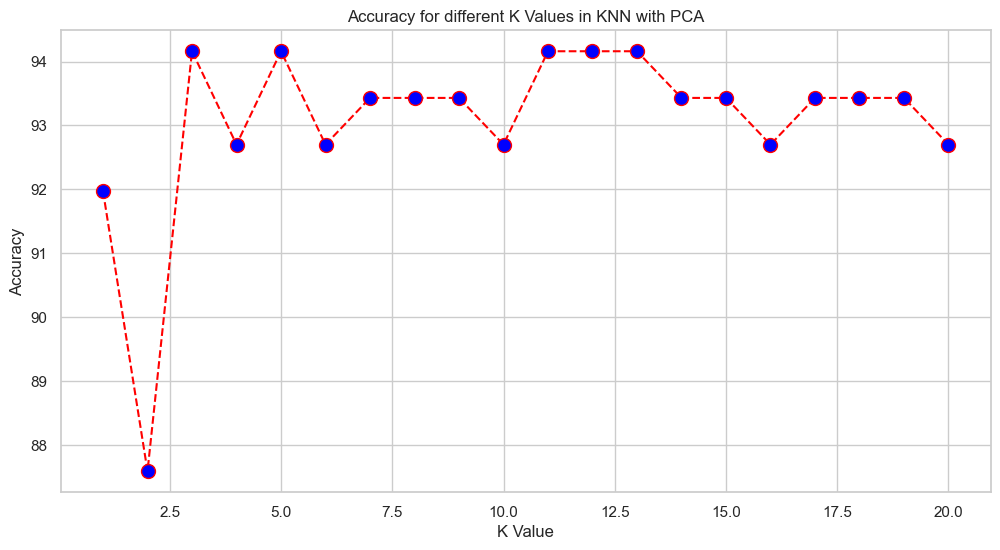

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fitting KNN 
knn_accuracies = []
for i in range(1, 21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model = classifier.fit(X_train_pca, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test_pca)
    
    # Making the Confusion Matrix
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix (KNN, k={i}):\n{cm_KNN}")
    print(f"Accuracy score of train KNN (k={i}): {accuracy_score(y_train, trained_model.predict(X_train_pca)) * 100}")
    accuracy_test = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy score of test KNN (k={i}): {accuracy_test}")
    
    knn_accuracies.append(accuracy_test)

# Plotting Accuracy for different K Values in KNN
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), knn_accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different K Values in KNN with PCA')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


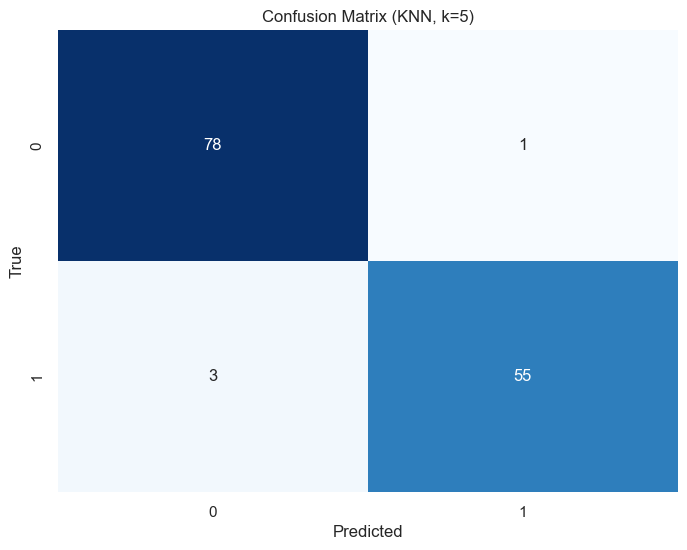

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fitting KNN 
k_value = 5  
classifier = KNeighborsClassifier(n_neighbors=k_value)
trained_model = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f'Confusion Matrix (KNN, k={k_value})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [90]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fitting SVM to the Training set
classifier = SVC(kernel='linear', random_state=0)

trained_model = classifier.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca)

# Making the Confusion Matrix for SVM
cm_SVM = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix (SVM):\n{cm_SVM}")
print(f"Accuracy score of train SVM: {accuracy_score(y_train, trained_model.predict(X_train_pca)) * 100}")
print(f"Accuracy score of test SVM: {accuracy_score(y_test, y_pred) * 100}")


Confusion Matrix (SVM):
[[78  1]
 [ 7 51]]
Accuracy score of train SVM: 97.25274725274726
Accuracy score of test SVM: 94.16058394160584


Training and evaluating Logistic Regression with PCA...

Accuracy: 0.9197

Confusion Matrix:
[[78  1]
 [10 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        79
           1       0.98      0.83      0.90        58

    accuracy                           0.92       137
   macro avg       0.93      0.91      0.92       137
weighted avg       0.93      0.92      0.92       137





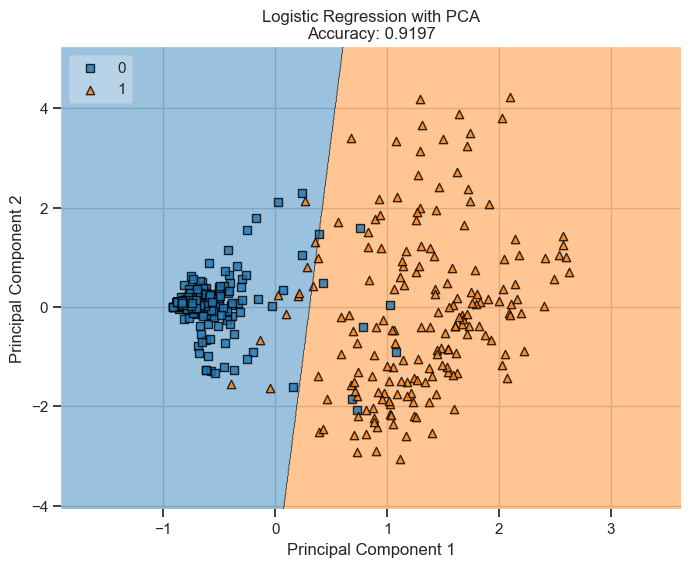

Training and evaluating Decision Tree with PCA...

Accuracy: 0.9197

Confusion Matrix:
[[77  2]
 [ 9 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        79
           1       0.96      0.84      0.90        58

    accuracy                           0.92       137
   macro avg       0.93      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137





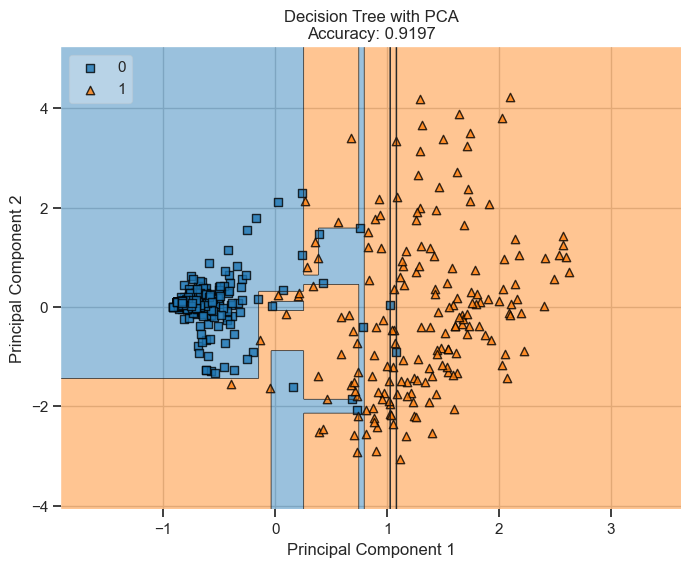

Training and evaluating Random Forest with PCA...

Accuracy: 0.9562

Confusion Matrix:
[[77  2]
 [ 4 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        79
           1       0.96      0.93      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137





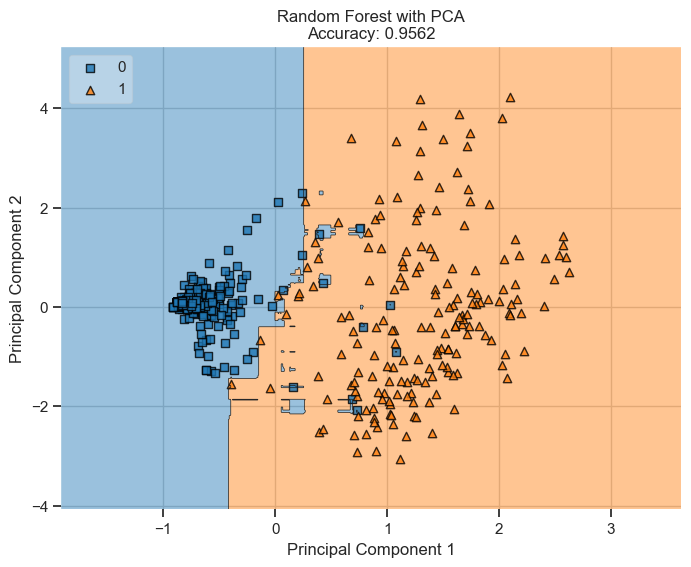

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Convert pandas Series to NumPy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Function to train and evaluate a classifier with PCA
def train_and_evaluate_classifier_pca(classifier, X_train_pca, y_train, X_test_pca, y_test):
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return accuracy

# Train and evaluate different classifiers after PCA
classifiers_without_knn_svm = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# Plot decision regions for each classifier after PCA
for name, classifier in classifiers_without_knn_svm.items():
    print(f"Training and evaluating {name} with PCA...\n")
    accuracy = train_and_evaluate_classifier_pca(classifier, X_train_pca, y_train_np, X_test_pca, y_test_np)
    print("\n" + "="*50 + "\n")

    # Plot decision regions with accuracy
    plt.figure(figsize=(8, 6))
    plot_decision_regions(np.array(X_train_pca), y_train_np, clf=classifier, legend=2)
    plt.title(f'{name} with PCA\nAccuracy: {accuracy:.4f}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


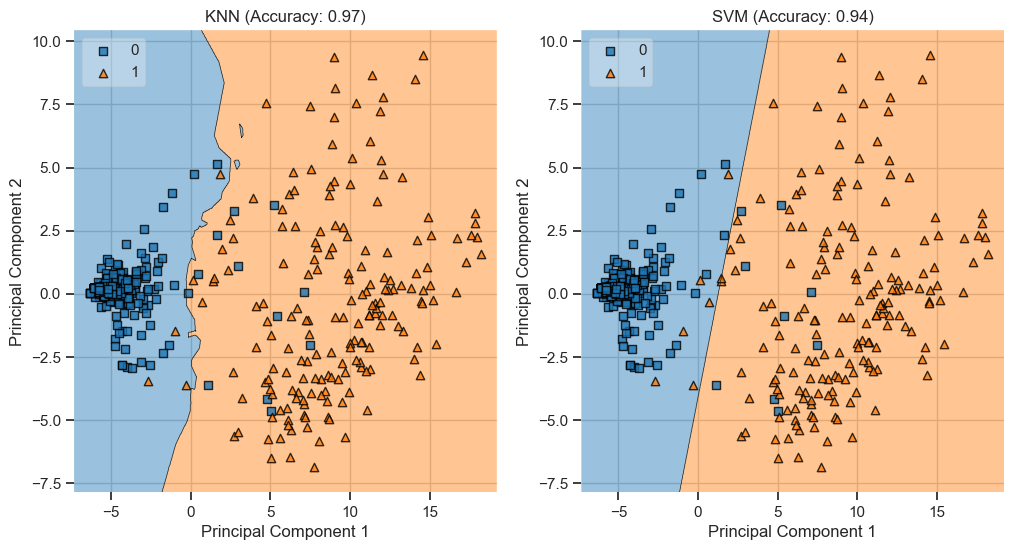

In [92]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


# Convert pandas Series to NumPy array
y_train_np = np.array(y_train)

# Plotting decision regions for KNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(X_train_pca, y_train_np, clf=knn, legend=2)
plt.title(f'KNN (Accuracy: {accuracy_knn:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting decision regions for SVM
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_pca, y_train_np, clf=svm, legend=2)
plt.title(f'SVM (Accuracy: {accuracy_svm:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()






In [30]:
#  distribution of classes
class_distribution = df['classes'].value_counts()

print(class_distribution)


classes
0    444
1    239
Name: count, dtype: int64


444 instances are labeled as benign tumors (class 0).
239 instances are labeled as malignant tumors (class 1).

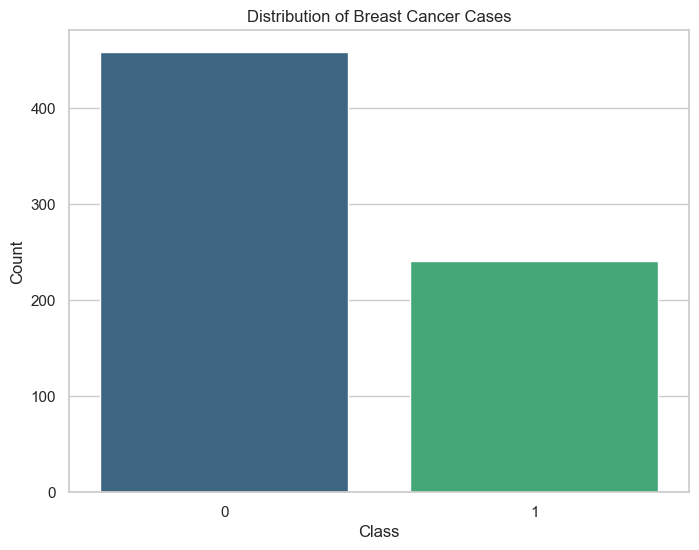

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Countplot to show the distribution of breast cancer cases
sns.countplot(x='classes', data=df, palette='viridis')

plt.title('Distribution of Breast Cancer Cases')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()


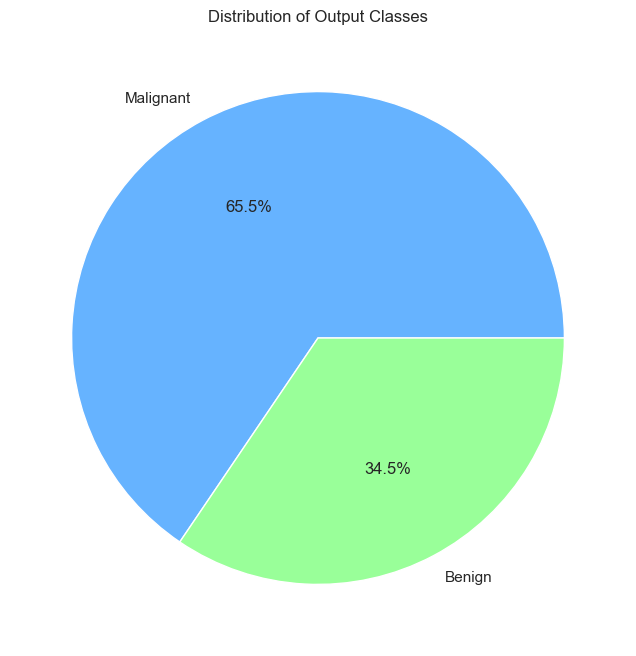

In [66]:
import matplotlib.pyplot as plt

class_counts = df['classes'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
labels = ['Malignant', 'Benign']  # Labels for the classes
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Output Classes')
plt.show()
